In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('merged_marginal_data.csv')

# Define input and output sequence lengths
sequence_length = 336  # Use 2 weeks of history for predictions six months
output_sequence_length = 24  # Predict the next 24 hours

# Prepare the input features and target prices
X, y = [], []

for i in range(len(data) - sequence_length - output_sequence_length):
    # Use 'Price1' and any other relevant features you have added
    features = data[['Price1', 'Hour_Sin', 'Hour_Cos']].values
    X.append(features[i:i + sequence_length])  # input sequence
    y.append(features[i + sequence_length:i + sequence_length + output_sequence_length, 0])  # output sequence of prices

X = np.array(X)  # Shape: (samples, sequence_length, features)
y = np.array(y)  # Shape: (samples, output_sequence_length)

# Normalize data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_shape = X.shape
X = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X_shape)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=output_sequence_length)  # Output layer for sequence prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 50  # Adjust based on your needs
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')


2024-11-12 16:31:45.914642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 16:31:45.929994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 16:31:45.936050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 16:31:46.016644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1731425511.215243    69

Epoch 1/50


2024-11-12 16:31:53.851034: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300


147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0712 - val_loss: 0.0280
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0292 - val_loss: 0.0257
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0265 - val_loss: 0.0244
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0254 - val_loss: 0.0238
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - val_loss: 0.0212
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - val_loss: 0.0226
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0216 - val_loss: 0.0209
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - val_loss: 0.0210
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0214 - val_loss: 0.0206
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - val_loss: 0.0214
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - val_loss: 0.0203
Epoch 12/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/ste

In [2]:
# Use the most recent data for prediction
recent_data = X[-1].reshape(1, sequence_length, X.shape[2])  # Shape it correctly for LSTM
predicted_sequence = model.predict(recent_data)

# Inverse transform the predictions to get actual prices
predicted_prices = scaler_y.inverse_transform(predicted_sequence).flatten()

# Print predicted prices for the next 24 hours
print("Predicted Prices for the Next 24 Hours:", predicted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Prices for the Next 24 Hours: [102.84313   97.66066   99.058014  90.45785   89.45247   91.35091
  92.27076  100.46129  109.755196 109.376175 107.22454   97.01874
  83.01624   82.51702   78.85113   75.466286  79.66807   82.68887
  92.4798   101.08228  116.339294 126.96226  126.19693  121.85727 ]


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


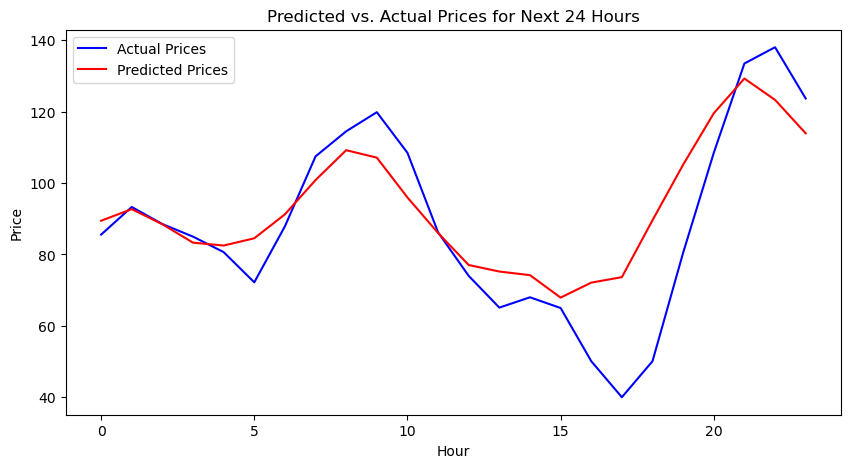

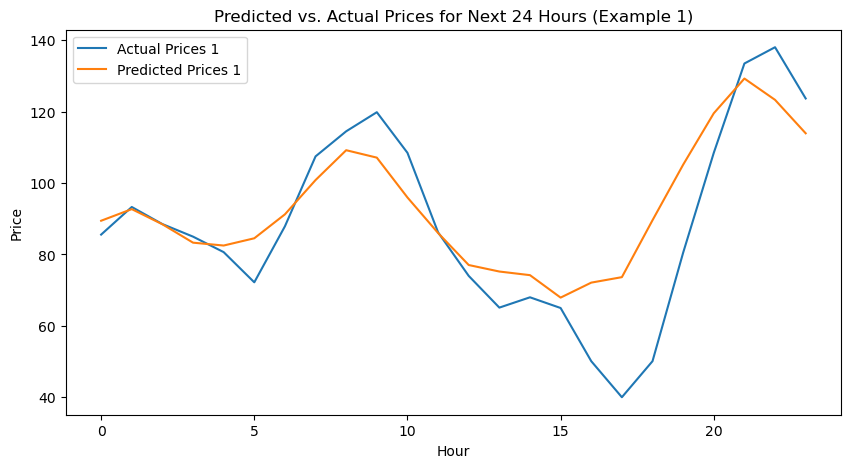

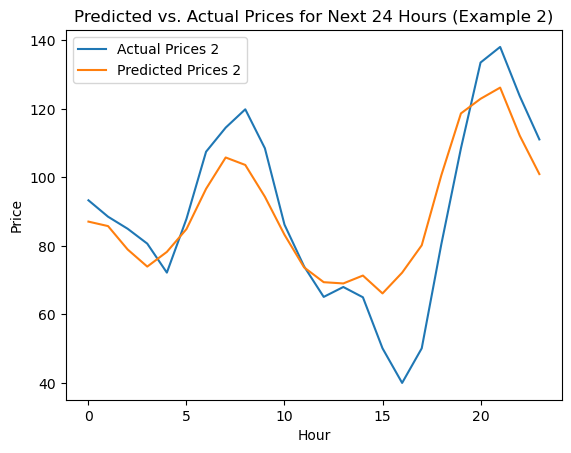

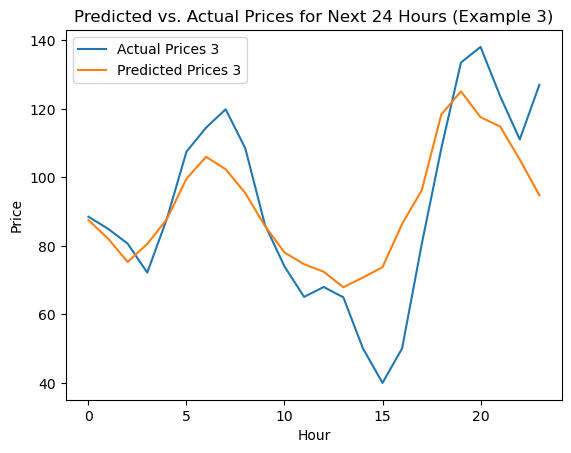

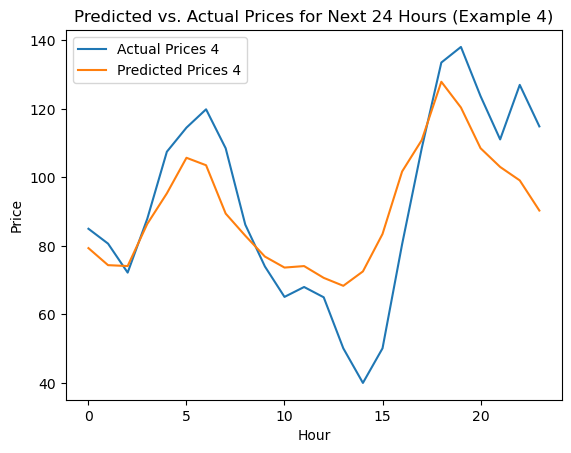

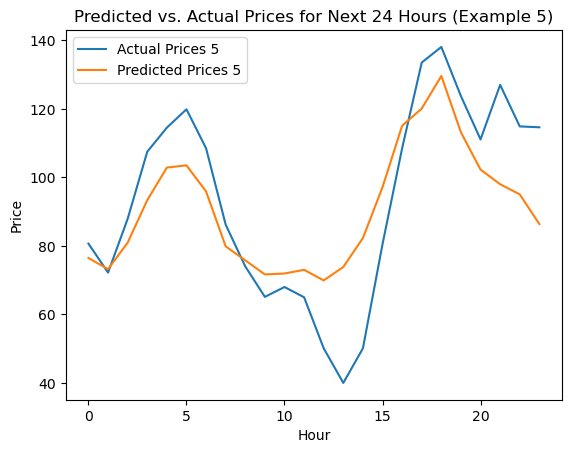

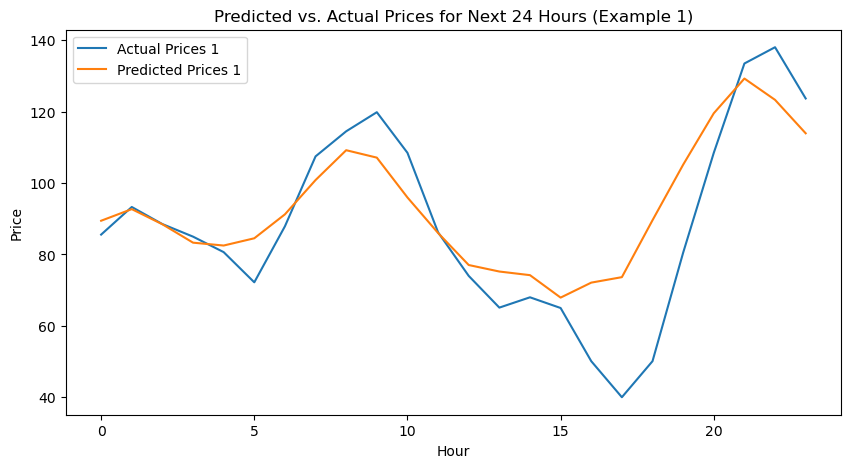

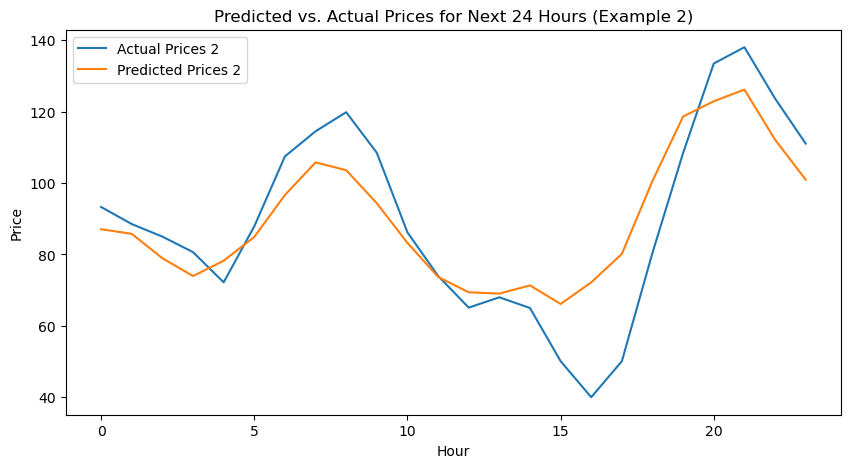

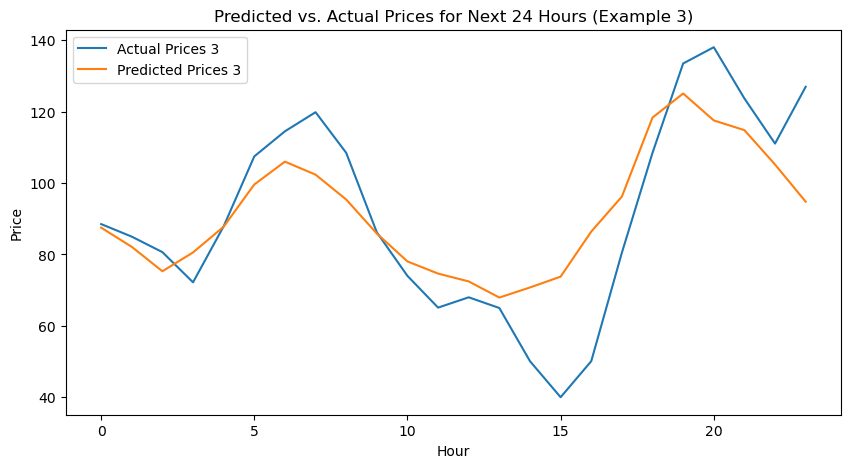

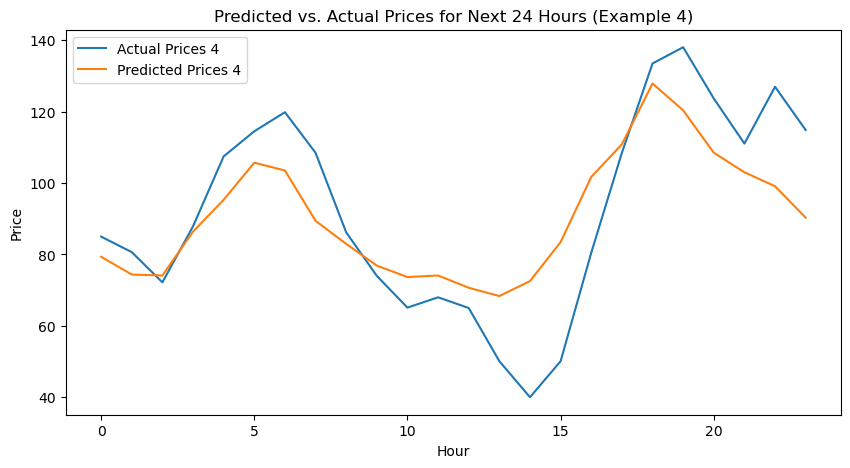

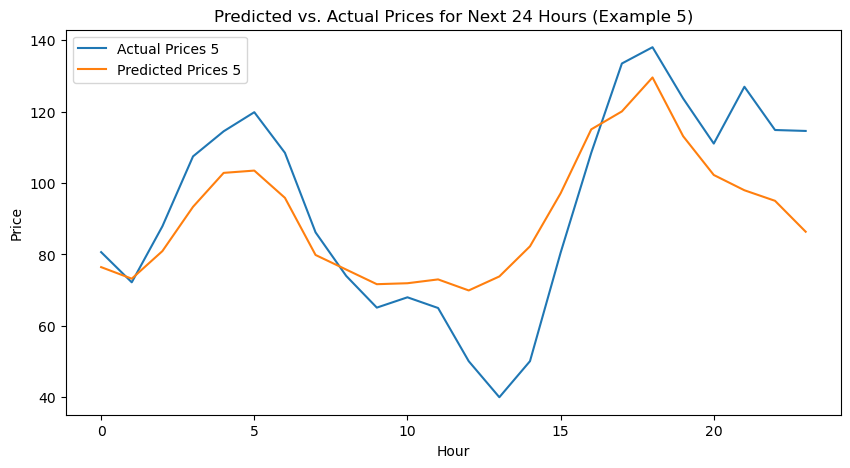

In [5]:
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Plot predictions vs. actual values for one test example
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual[0], label="Actual Prices", color="blue")
plt.plot(y_test_pred[0], label="Predicted Prices", color="red")
plt.title("Predicted vs. Actual Prices for Next 24 Hours")
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.show()

# lets look at more results, to see if the model is doing well

# Plot predictions vs. actual values for multiple test examples
plt.figure(figsize=(10, 5))
for i in range(5):  # Plot the first 5 examples
    plt.plot(y_test_actual[i], label=f"Actual Prices {i+1}")
    plt.plot(y_test_pred[i], label=f"Predicted Prices {i+1}")
# lets now plot the 5 examples one plot for each example

    plt.title(f"Predicted vs. Actual Prices for Next 24 Hours (Example {i+1})")
    plt.xlabel("Hour")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# lets plot each result in a separate plot
for i in range(5):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual[i], label=f"Actual Prices {i+1}")
    plt.plot(y_test_pred[i], label=f"Predicted Prices {i+1}")
    plt.title(f"Predicted vs. Actual Prices for Next 24 Hours (Example {i+1})")
    plt.xlabel("Hour")
    plt.ylabel("Price")
    plt.legend()
    plt.show()




In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


2024-11-12 16:06:52.360838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 16:06:52.376097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 16:06:52.381416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 16:06:52.461522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1731424015.886107   952

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the updated merged data
data = pd.read_csv('merged_marginal_data_with_gas.csv')

# Define input and output sequence lengths
sequence_length = 336  # Use 2 weeks of history for predictions
output_sequence_length = 24  # Predict the next 24 hours

# Prepare the input features and target prices
X, y = [], []

for i in range(len(data) - sequence_length - output_sequence_length):
    features = data[['Price1', 'Hour_Sin', 'Hour_Cos', 'Month_Sin', 'Month_Cos', 'Gas_Price']].values
    X.append(features[i:i + sequence_length])  # input sequence
    y.append(features[i + sequence_length:i + sequence_length + output_sequence_length, 0])  # output sequence of prices

X = np.array(X)  # Shape: (samples, sequence_length, features)
y = np.array(y)  # Shape: (samples, output_sequence_length)

# Normalize data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_shape = X.shape
X = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X_shape)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Create TensorFlow datasets for training and testing
batch_size = 32

# Create a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=output_sequence_length)  # Output layer for sequence prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 50  # Adjust based on your needs

model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

# Evaluate the model
train_loss = model.evaluate(train_dataset, verbose=0)
test_loss = model.evaluate(test_dataset, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')


: 

In [ ]:
# Use the most recent data for prediction
recent_data = X[-1].reshape(1, sequence_length, X.shape[2])  # Reshape for LSTM input
predicted_sequence = model.predict(recent_data)

# Inverse transform the predictions to get actual price values
predicted_prices = scaler_y.inverse_transform(predicted_sequence).flatten()

print("Predicted Prices for the Next 7 Days:", predicted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Prices for the Next 7 Days: [132.4475   120.42226  109.03006  100.70659   94.25054   91.97177
  96.44776  107.86735  101.54272  106.62262  107.631325  96.652885
  91.87827   80.02202   77.89401   82.89314   84.60667   93.30589
  96.849144 106.329414 120.81486  131.03612  133.48909  128.64415
 132.66814  124.513306 126.01918  121.84709  118.18138  122.681915
 125.38014  137.65698  142.91196  145.23732  138.16771  117.23165
 112.66968  103.98023  104.78452   98.96304  102.4514   102.127266
 114.64875  127.13961  132.88057  135.6426   144.71031  133.95537
 127.36947  128.15318  120.27547  113.675    116.74881  112.90283
 117.802666 122.49691  131.60738  129.04391  125.49812  122.122795
 113.37766  111.961105 107.755554 102.24123  103.084274 108.213715
 115.545815 126.90523  135.6329   138.42143  134.8593   122.2525
 111.449936  98.00216   92.78267   81.36288   71.18609   77.5158
  79.82527   92.1365    95.31237   93.147255  89.703255  85.637

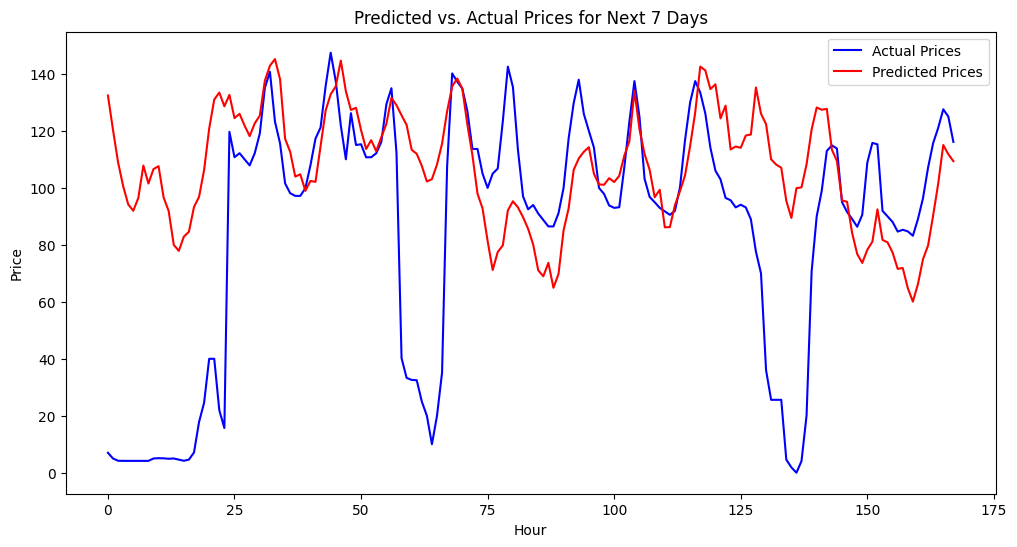

In [ ]:
import matplotlib.pyplot as plt

# Get actual prices for the next 7 days
actual_prices = data['Price1'].values[-output_sequence_length:]

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predicted_prices, label="Predicted Prices", color="red")
plt.title("Predicted vs. Actual Prices for Next 7 Days")
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.show()
